## Task 2 : THE  SPARKS FOUNDATION  APRIL'21

## Prediction using Unsupervised  Machine Learning

**Description ** :  From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.


**Dataset Used : ** https://bit.ly/3kXTdox

Done By : Jhumpa Sarma
          Data Science
          and Business Analytics Intern

## Importing the  necessary libraries

In [77]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pickle
import os
%matplotlib inline

# Import the dataset and study its features

In [78]:
df = pd.read_csv('Iris.csv')
print("Dataset has been loaded")

Dataset has been loaded


In [9]:
## Let us check for duplicate data and check if any value is null
df= df.drop_duplicates()
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.shape  ## Provides the dimensions of the data

(150, 6)

In [11]:
df.head()     ## Print the first five rows of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()  ## Provides the statistics of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
X=df.iloc[:,:]

In [83]:
sc=StandardScaler()
X_std=sc.fit_transform(X)
X_std=pd.DataFrame(X_std)
X_std.columns=X.columns

In [84]:
X_std

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [ ]:
## So, to obtain k-means clustering, standardization must be performed before training the algorithm.

# Determining the value of k using elbow method

In [79]:
from sklearn.cluster import KMeans

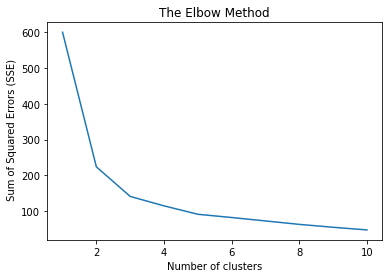

In [80]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X_std)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel(' Sum of Squared Errors (SSE)')
plt.show()

In [ ]:
## From the elbow method, we can see that the number of optimal clusters is 3.

## We can visualize the elbow as a bending line at k = 3

# Training the algorithm and fitting the dataset

In [62]:
## Creating the k-means classifier

In [81]:
km=KMeans(n_clusters=3,max_iter=100,init='k-means++')

## FITTING Model Prediction With Standardization

In [87]:
y_kmeans=km.fit_predict(X_std)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

## Fitting model - without Standardization

In [88]:
km1=KMeans(n_clusters=3,max_iter=100,init='k-means++')
y_kmeans1=km1.fit_predict(X)
y_kmeans1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Visualize the clusters

In [60]:
## Without Standardising features

<function matplotlib.pyplot.show(close=None, block=None)>

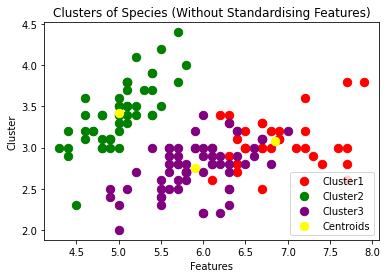

In [94]:
plt.scatter(X.iloc[y_kmeans1==0,0],X.iloc[y_kmeans1==0,1],s=70,c='Red',label='Cluster1')
plt.scatter(X.iloc[y_kmeans1==1,0],X.iloc[y_kmeans1==1,1],s=70,c='green',label='Cluster2')
plt.scatter(X.iloc[y_kmeans1==2,0],X.iloc[y_kmeans1==2,1],s=70,c='purple',label='Cluster3')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],s=70,c='yellow',label='Centroids')

plt.title('Clusters of Species (Without Standardising Features)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()
plt.show

In [61]:
## With standardising features

<function matplotlib.pyplot.show(close=None, block=None)>

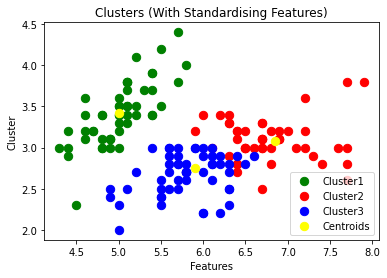

In [93]:
plt.scatter(X.iloc[y_kmeans==0,0],X.iloc[y_kmeans==0, 1],s=70,c='green',label='Cluster1')
plt.scatter(X.iloc[y_kmeans==1,0],X.iloc[y_kmeans==1, 1],s=70,c='red',label='Cluster2')
plt.scatter(X.iloc[y_kmeans==2,0],X.iloc[y_kmeans== 2,1],s=70,c='blue',label='Cluster3')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1], s=70,c='yellow',label='Centroids')

plt.title('Clusters (With Standardising Features)')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.legend()
plt.show

# Conclusion :

**Clearly Clusters 2 and Cluster3 are more accurate in the standardized training model**